In [72]:
import os
import numpy as np
import matplotlib.pyplot as plt

## Exercitiul 1

### Punctul a

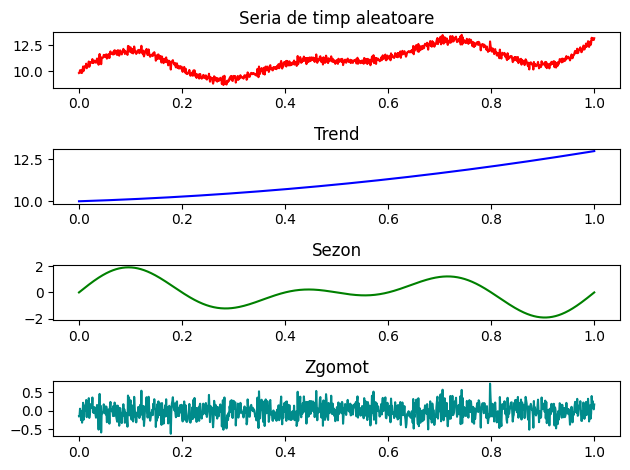

In [73]:
def trend(t: np.ndarray, a: int = 2, b: int = 1, c: int = 10) -> np.ndarray:
    return a * t ** 2 + b * t + c

def sezon(f1: int, f2: int, t: np.ndarray) -> np.ndarray:
    return np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

def zgomot(scale: float, t: np.ndarray) -> np.ndarray:
    return np.random.normal(0, scale, len(t))

N = 1000
t = np.linspace(0, 1, N)

TREND = trend(t)
SEZON = sezon(3, 2, t)
ZGOMOT = zgomot(0.2, t)
time_series = TREND + SEZON + ZGOMOT

signals = [time_series, TREND, SEZON, ZGOMOT]
titles = [
    "Seria de timp aleatoare",
    "Trend",
    "Sezon",
    "Zgomot"
]
colors = ['red', 'blue', 'green', 'darkcyan']

fig, axs = plt.subplots(4, 1)
for i, signal in enumerate(signals):
    axs[i].plot(t, signal, color=colors[i])
    axs[i].set_title(titles[i])
    
plt.tight_layout()

if not os.path.exists('exercitiul1'):
    os.mkdir('exercitiul1')

plt.savefig(os.path.join('exercitiul1', f"pct_a.png"))
plt.savefig(os.path.join('exercitiul1', f"pct_a.pdf"))

plt.show()

### Punctul b

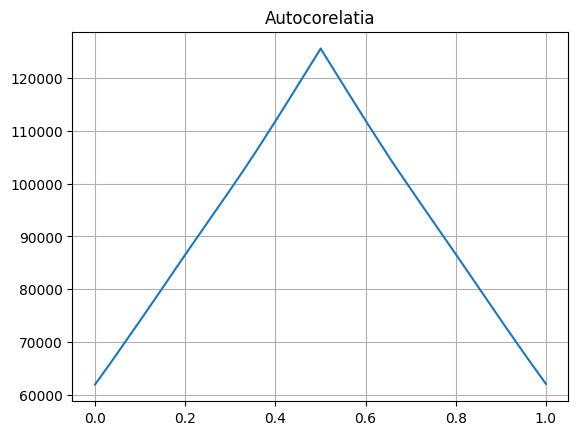

In [85]:
auto_correlation_array = np.correlate(time_series, time_series, mode='same')

plt.plot(t, auto_correlation_array)
plt.title("Autocorelatia")
plt.grid()

plt.savefig(os.path.join('exercitiul1', f"pct_b.png"))
plt.savefig(os.path.join('exercitiul1', f"pct_b.pdf"))

plt.show()
plt.close()

### Punctul c

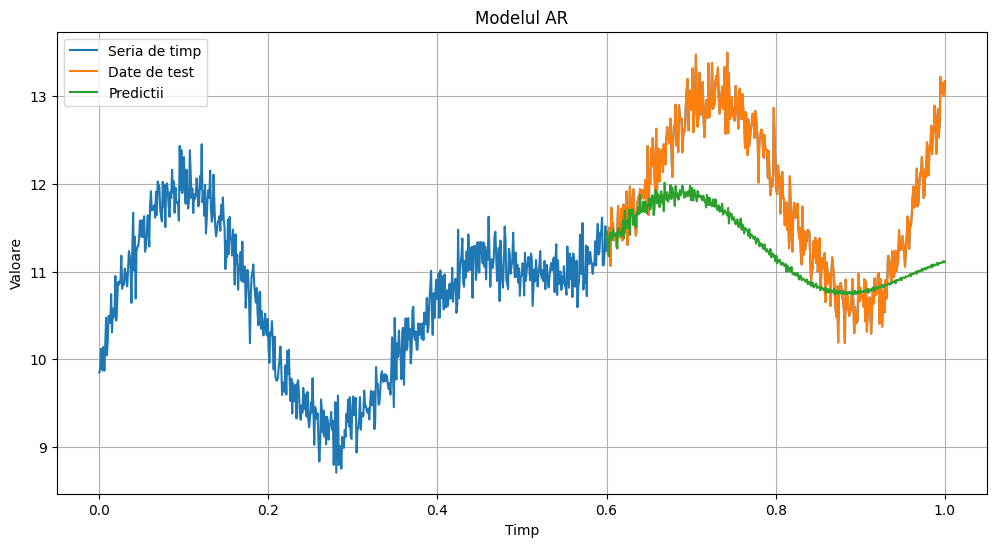

In [77]:
from statsmodels.tsa.ar_model import AutoReg

train_size = 600
train_t, train_series = t[:train_size], time_series[:train_size]
test_t, test_series = t[train_size:], time_series[train_size:]

p = 110
predictions = AutoReg(train_series, lags=p).fit().predict(start=train_size, end=N-1, dynamic=False)

plt.figure(figsize=(12, 6))
plt.plot(t, time_series, label='Seria de timp')
plt.plot(test_t, test_series, label='Date de test')
plt.plot(test_t, predictions, label=f'Predictii')
plt.title(f'Modelul AR')
plt.xlabel('Timp')
plt.ylabel('Valoare')
plt.legend()
plt.grid()

plt.savefig(os.path.join('exercitiul1', f"pct_c.png"))
plt.savefig(os.path.join('exercitiul1', f"pct_c.pdf"))

plt.show()

### Punctul d

In [86]:
from sklearn.metrics import mean_squared_error

best_p, best_m, best_mse = None, None, float('inf')

for p in range(1, 50):
    for m in range(1, 50):
        model = AutoReg(train_series, lags=p)
        results = model.fit()
        predictions = results.predict(start=train_size, end=train_size + m - 1)

        mse = mean_squared_error(test_series[:m], predictions)
        if mse < best_mse:
            best_p, best_m, best_mse = p, m, mse

print(f'Cel mai bun p: {best_p}')
print(f'Cel mai bun m: {best_m}')
print(f'MSE: {best_mse}')

Cel mai bun p: 36
Cel mai bun m: 1
MSE: 2.1058489452429305e-07
